<a href="https://colab.research.google.com/github/sielefaith/Neural-Nets/blob/feature/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
 
 
x1 = tf.placeholder(tf.float32,1)
w1 = tf.placeholder(tf.float32,1)
x2 = tf.placeholder(tf.float32,1)
w2 = tf.placeholder(tf.float32,1)
 
z1 = tf.multiply(x1, w1)
z2 = tf.multiply(x2, w2)
z3 = tf.add(z1, z2)
 
feed_dict = {x1:[1], w1:[2], x2:[3], w2:[4]}
sess = tf.Session()
sess.run(z3, feed_dict)

array([14.], dtype=float32)

The dataset has 506 training samples
The dataset has 13 features
(13, 506)
(506,)
(1, 506)
Reached epoch 0 cost J =  606.887146
Reached epoch 1000 cost J =  21.952604
Reached epoch 2000 cost J =  21.899088
Reached epoch 3000 cost J =  21.895166
Reached epoch 4000 cost J =  21.894857
Reached epoch 5000 cost J =  21.894833
Reached epoch 6000 cost J =  21.894835
Reached epoch 7000 cost J =  21.894833
Reached epoch 8000 cost J =  21.894833
Reached epoch 9000 cost J =  21.894833
Reached epoch 10000 cost J =  21.894833


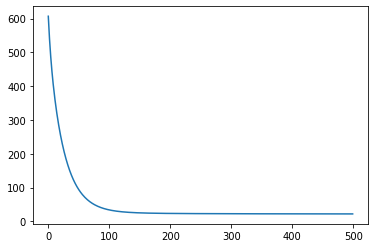

In [2]:
 
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
#from sklearn.datasets import load_boston
 
from sklearn.datasets import load_boston
 
boston = load_boston()
features = np.array(boston.data)
labels = np.array(boston.target)
 
#print(boston["DESCR"])
 
n_training_samples = features.shape[0]
n_dim = features.shape[1]
print('The dataset has',n_training_samples,'training samples')
print('The dataset has',n_dim,'features')
 
 
#NORMALIZE FEATURES
def normalize(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.std(dataset, axis=0)
    return (dataset - mu) / sigma
 
features_norm = normalize(features)
#print(features_norm)
#we'll use all the data for training
train_X = np.transpose(features_norm)
train_y = np.transpose(labels)
 
#Dimensions of our new matrices
print(train_X.shape)
print(train_y.shape)
 
#Reshape array
train_y = train_y.reshape(1, len(train_y))
print(train_y.shape)
 
#NEURON $ COSTFUNCTION(LINEAR REGRESSION)
#IDENTITY ACTIVATION FUNCTION
#MSE(MEAN SQUARED ERROR)==>loss to be minimized
 
tf.reset_default_graph()
 
X = tf.placeholder(tf.float32,[n_dim, None])
y = tf.placeholder(tf.float32,[1, None])
learning_rate = tf.placeholder(tf.float32, shape=())
w = tf.Variable(tf.ones([n_dim, 1]))
b = tf.Variable(tf.zeros(1))
 
init = tf.global_variables_initializer()
y_ = tf.matmul(tf.transpose(w),X) + b
cost = tf.reduce_mean(tf.square(y_ - y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
 
def run_linear_model(learning_r, training_epochs, train_obs, train_labels, debug = False):
    sess = tf.Session()
    sess.run(init)
    cost_history = np.empty(shape=[0], dtype = float)
    
    for epoch in range(training_epochs + 1):
        sess.run(training_step, feed_dict={X:train_obs, y:train_labels, learning_rate:learning_r})
        cost_ = sess.run(cost, feed_dict ={X:train_obs, y:train_labels, learning_rate:learning_r})
        cost_history = np.append(cost_history, cost_)
        if(epoch % 1000 == 0) & debug:
            print("Reached epoch",epoch,"cost J = ", str.format('{0:.6f}', cost_))
 
    return sess, cost_history
 
 
sess, cost_history = run_linear_model(learning_r = 0.01, training_epochs = 10000, train_obs = train_X, train_labels = train_y, debug = True)
plt.plot(cost_history[:500])
plt.show()